<a href="https://colab.research.google.com/github/okonp07/Optimizing-Euro-Stoxx-50-Investments/blob/main/Optimizing_Euro_Stoxx_50_Investments_A_UCB_Algorithm_Based_Stock_Selection_Strategy_with_Correlation_Driven_Hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Optimizing Euro Stoxx 50 Investments: A UCB Algorithm-Based Stock Selection Strategy with Correlation-Driven Hedging

Authors | **Okon Prince | Frackson Makwangwala | Elizabeth Ajabor**


---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import seed
from numpy.random import rand
import yfinance as yf
import pandas as pd

# Euro Stoxx 50 Portfolio Optimization and Hedging Strategy

Welcome to the Euro Stoxx 50 Portfolio Optimization and Hedging Strategy project! In this notebook, we will explore an optimal investment strategy for the Euro Stoxx 50, a prominent European stock market index. Our goal is to use data analysis and quantitative techniques to make informed investment decisions and hedge our portfolio effectively.

## Project Overview

The Euro Stoxx 50 represents the performance of the top 50 blue-chip stocks from various Eurozone countries. Investing in such a diverse portfolio can be challenging, but by leveraging data-driven strategies, we aim to identify the most promising stocks for investment and use a robust hedging approach to manage risk.

## Key Steps in the Project

1. **Data Collection:** We will start by collecting historical stock price data for the Euro Stoxx 50 components. This data will serve as the foundation for our analysis.

2. **Portfolio Selection:** Using the UCB (Upper Confidence Bound) algorithm, we will identify the five optimum stocks for trading. These stocks will form the core of our portfolio.

3. **Correlation Analysis:** To minimize risk, we will conduct a correlation analysis of the remaining stocks in the Euro Stoxx 50. This analysis will help us identify the least correlated stock to our portfolio.

4. **Hedging Strategy:** With the least correlated stock identified, we will develop a hedging strategy to protect our portfolio against market fluctuations.

5. **Performance Evaluation:** We will assess the performance of our portfolio and hedging strategy, considering factors such as returns, risk, and volatility.

## Why This Project Matters

In today's dynamic financial markets, making informed investment decisions is crucial. This project combines data analysis and quantitative methods to optimize your investment strategy. Whether you're a seasoned investor or just starting in the world of finance, the insights gained from this project can be valuable for your investment journey.

## Getting Started

To get started, make sure you have the necessary libraries installed, and follow along with the code and explanations provided in the notebook.


In [53]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols for the companies
ticker_symbols = [
    "ADS.DE", "ADYEN.AS", "AD.AS", "AI.PA", "AIR.PA", "ALV.DE", "ABI.BR", "ASML.AS", "AXA.PA", "BBVA.MC",
    "BAS.DE", "BAYN.DE", "BMW.DE", "BNP.PA", "BN.PA", "DB1.DE", "DTE.DE", "DPW.DE", "ENEL.MI", "ENI.MI",
    "EL.PA", "RACE.MI", "FLTR.L", "RMS.PA", "IBE.MC", "ITX.MC", "IFX.DE", "INGA.AS", "ISP.MI", "KER.PA",
    "OR.PA", "MC.PA", "DAI.DE", "MUV2.DE", "NOKIA.HE", "NDA.SE", "RI.PA", "PRX.AS", "SAF.PA", "SGO.PA",
    "SAN.PA", "SAN.MC", "SAP.DE", "SU.PA", "SIE.DE", "STLA.MI", "TTE.PA", "DG.PA", "UCG.MI", "VOW3.DE"
]

# Define the date range
start_date = "2023-06-01"
end_date = "2023-10-31"

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Fetch historical data for each stock
for stock_symbol in ticker_symbols:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    combined_data[stock_symbol] = stock_data['Adj Close']

# Print the first few rows of the combined data
print(combined_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AXA.PA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPW.DE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DAI.DE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDA.SE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STLA.MI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                ADS.DE     ADYEN.AS      AD.AS       AI.PA      AIR.PA  \
Date                                                                     
2023-06-02  159.520004  1582.000000  28.895082  159.380005  128.380005   
2023-06-05  158.300003  1580.199951  29.087027  158.240005  126.720001   
2023-06-06  159.679993  1584.400024  29.072262  157.779999  127.440002   
2023-06-07  159.259995  1595.000000  28.968908  156.899994  126.440002   
2023-06-08  159.020004  1583.000000  28.988594  156.699997  126.540001   

                ALV.DE     ABI.BR     ASML.AS  AXA.PA   BBVA.MC  ...  \
Date                                                             ...   
2023-06-02  210.149994  50.910000  671.373657     NaN  6.354

In [54]:
combined_data.head(20)

,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,ABI.BR,ASML.AS,AXA.PA,BBVA.MC,...,SAN.PA,SAN.MC,SAP.DE,SU.PA,SIE.DE,STLA.MI,TTE.PA,DG.PA,UCG.MI,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-02,159.520004,1582.000000,28.895082,159.380005,128.380005,210.149994,50.910000,671.373657,NaN,6.354721,...,94.980003,3.137158,124.360001,165.619995,159.279999,NaN,53.773163,107.580002,18.858000,121.540001
2023-06-05,158.300003,1580.199951,29.087027,158.240005,126.720001,209.949997,50.910000,671.970764,NaN,6.329264,...,95.330002,3.110771,123.080002,164.000000,158.520004,NaN,53.451572,106.940002,18.417999,122.540001
2023-06-06,159.679993,1584.400024,29.072262,157.779999,127.440002,210.500000,51.150002,665.999512,NaN,6.342972,...,96.370003,3.136181,123.400002,164.160004,158.360001,NaN,52.954575,106.959999,18.700001,124.040001
2023-06-07,159.259995,1595.000000,28.968908,156.899994,126.440002,208.850006,51.660000,664.705750,NaN,6.352763,...,94.949997,3.138135,123.500000,163.820007,158.460007,NaN,53.393105,107.680000,18.482000,124.339996
2023-06-08,159.020004,1583.000000,28.988594,156.699997,126.540001,208.899994,50.860001,659.530640,NaN,6.448720,...,95.440002,3.153772,123.599998,163.979996,158.759995,NaN,53.626987,107.220001,18.658001,125.760002
2023-06-09,160.000000,1577.800049,28.703136,156.600006,128.419998,207.949997,51.169998,663.411926,NaN,6.374305,...,95.400002,3.128851,123.199997,163.940002,158.139999,NaN,53.549023,106.699997,18.350000,126.279999
2023-06-13,172.800003,1600.400024,29.018124,158.860001,130.039993,208.949997,51.459999,677.344971,NaN,6.395846,...,93.930000,3.119566,125.260002,166.240005,164.460007,NaN,52.779167,106.739998,18.516001,130.839996
2023-06-14,174.699997,1625.000000,29.214991,159.580002,129.520004,209.750000,52.320000,678.439697,NaN,6.634760,...,93.980003,3.176250,125.480003,166.259995,164.339996,NaN,52.535542,108.760002,19.122000,131.740005
2023-06-15,174.179993,1619.199951,29.146088,160.300003,129.899994,209.800003,53.080002,670.577454,NaN,6.593636,...,94.260002,3.121521,124.779999,164.580002,165.779999,NaN,52.379620,108.279999,18.846001,130.080002


In [55]:
# Remove columns with all NaN values
combined_data = combined_data.dropna(axis=1, how='all')
combined_data.shape

(105, 45)

In [56]:
# Remove rows with all NaN values
combined_data = combined_data.dropna(axis=0, how='all')
combined_data.shape


(105, 45)

In [57]:
# Calculate daily returns
returns_df = combined_data.pct_change()

# Drop the first row (NaN row) as it doesn't have a previous day's data for calculation
returns_df = returns_df.dropna()

# Print the first few rows of returns_df
print(returns_df.head())


              ADS.DE  ADYEN.AS     AD.AS     AI.PA    AIR.PA    ALV.DE  \
Date                                                                     
2023-06-05 -0.007648 -0.001138  0.006643 -0.007153 -0.012930 -0.000952   
2023-06-06  0.008718  0.002658 -0.000508 -0.002907  0.005682  0.002620   
2023-06-07 -0.002630  0.006690 -0.003555 -0.005577 -0.007847 -0.007838   
2023-06-08 -0.001507 -0.007524  0.000680 -0.001275  0.000791  0.000239   
2023-06-09  0.006163 -0.003285 -0.009847 -0.000638  0.014857 -0.004548   

              ABI.BR   ASML.AS   BBVA.MC    BAS.DE  ...    SGO.PA    SAN.PA  \
Date                                                ...                       
2023-06-05  0.000000  0.000889 -0.004006 -0.005450  ... -0.004573  0.003685   
2023-06-06  0.004714 -0.008886  0.002166  0.004835  ...  0.012128  0.010909   
2023-06-07  0.009971 -0.001943  0.001544 -0.006630  ...  0.017611 -0.014735   
2023-06-08 -0.015486 -0.007786  0.015105  0.009042  ...  0.005352  0.005161   
2023-06

In [58]:
from google.colab import files
# Convert the dataframes to CSV files
returns_df.to_csv('returns_df.csv', index=False)
combined_data.to_csv('combined_data.csv', index=False)

# Trigger download to your local machine
files.download('returns_df.csv')
files.download('combined_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
import numpy as np
import pandas as pd

# Assuming returns_df is your dataframe with stock returns

# Parameters from your setup
NK = returns_df.shape[1]  # Number of stocks
ALPHA = 0.85  # Learning rate
NEPISODES = 1000  # Number of episodes
HOLD = 1  # Holding period for a stock
TMAX = returns_df.shape[0] - HOLD  # Maximum time steps

# Initialize variables
number_of_selections = np.zeros(NK)  # Track number of times each stock is selected
sum_of_rewards = np.zeros(NK)  # Track sum of rewards for each stock
total_selections = 0  # Total number of selections made

# UCB Algorithm with integrated parameters
for t in range(TMAX):  # Iterate over each time step, using TMAX
    stock_selected = 0
    max_upper_bound = 0

    for i in range(NK):  # Use NK instead of n_stocks
        if number_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = np.sqrt(2 * np.log(t + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            stock_selected = i

    number_of_selections[stock_selected] += 1
    reward = returns_df.iloc[t, stock_selected]  # Get the reward for the selected stock
    sum_of_rewards[stock_selected] += reward
    total_selections += 1  # Increment the total selections

# Identifying the top 5 stocks
top_stocks_indices = np.argsort(number_of_selections)[-5:]  # Get indices of top 5 stocks
top_stocks = returns_df.columns[top_stocks_indices].tolist()  # Get the stock names as a list

# Print the top stocks
print("Top 5 Stocks:", top_stocks)


Top 5 Stocks: ['SAF.PA', 'EL.PA', 'INGA.AS', 'SAN.MC', 'ENI.MI']


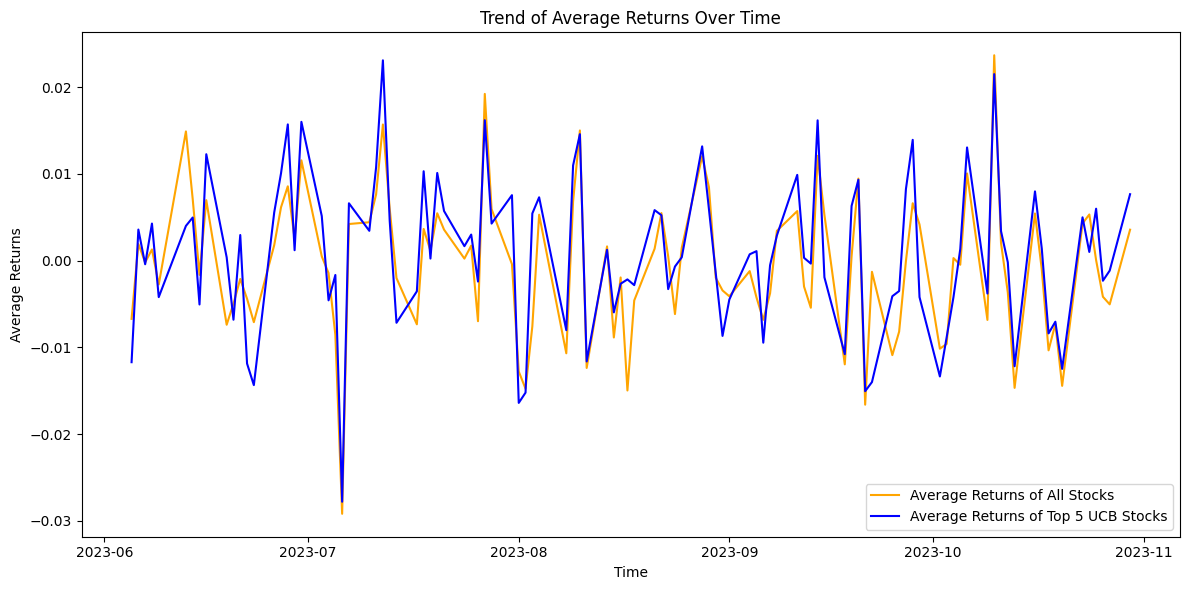

In [60]:
import matplotlib.pyplot as plt

# Calculate the average returns of all stocks at each time step
average_returns_all_times = returns_df.mean(axis=1)
# Calculate the average returns of the top 5 UCB stocks at each time step
average_returns_top_5_times = returns_df[top_stocks].mean(axis=1)

# Creating the plot
plt.figure(figsize=(12, 6))

# Plotting trend line for average returns of all stocks
plt.plot(average_returns_all_times, label='Average Returns of All Stocks', color='orange')

# Plotting trend line for average returns of top 5 UCB stocks
plt.plot(average_returns_top_5_times, label='Average Returns of Top 5 UCB Stocks', color='blue')

plt.title('Trend of Average Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Average Returns')
plt.legend()
plt.tight_layout()

plt.show()


In [61]:
import numpy as np
import random

# Assuming returns_df is your dataframe with stock returns
pdata = returns_df.to_numpy()

# Parameters to integrate
NK = pdata.shape[1]  # Number of stocks, replacing n_stocks
EPSILON = 0.1  # Exploration rate, replacing epsilon
ALPHA = 0.85  # Learning rate, will be used in the update formula
NEPISODES = 1000  # Number of episodes, may be used if running multiple simulations
HOLD = 1  # Holding period for a stock, not used directly in epsilon-greedy
TMAX = pdata.shape[0] - HOLD  # Maximum time steps, replacing range(returns_df.shape[0])

# Initialize variables
average_reward = np.zeros(NK)  # Using NK instead of n_stocks
number_of_selections = np.zeros(NK)  # Using NK instead of n_stocks

# Epsilon-Greedy Algorithm with integrated parameters
for t in range(TMAX):  # Using TMAX instead of returns_df.shape[0]
    if random.random() < EPSILON:  # Using EPSILON instead of epsilon
        # Exploration: choose a random stock
        stock_selected = random.randint(0, NK - 1)
    else:
        # Exploitation: choose the best stock so far
        stock_selected = np.argmax(average_reward)

    # Update the number of selections and average reward
    number_of_selections[stock_selected] += 1
    reward = pdata[t, stock_selected]  # Using pdata to get the reward
    # Update formula using ALPHA
    average_reward[stock_selected] = (average_reward[stock_selected] * (number_of_selections[stock_selected] - 1) + ALPHA * reward) / number_of_selections[stock_selected]

# Identifying the top 5 stocks
top_stocks_epsilon_greedy_indices = np.argsort(number_of_selections)[-5:]
top_stocks_epsilon_greedy = returns_df.columns[top_stocks_epsilon_greedy_indices].tolist()

# Print the top stocks
print("Top 5 Stocks:", top_stocks_epsilon_greedy)


Top 5 Stocks: ['ADS.DE', 'EL.PA', 'ADYEN.AS', 'AD.AS', 'SAF.PA']


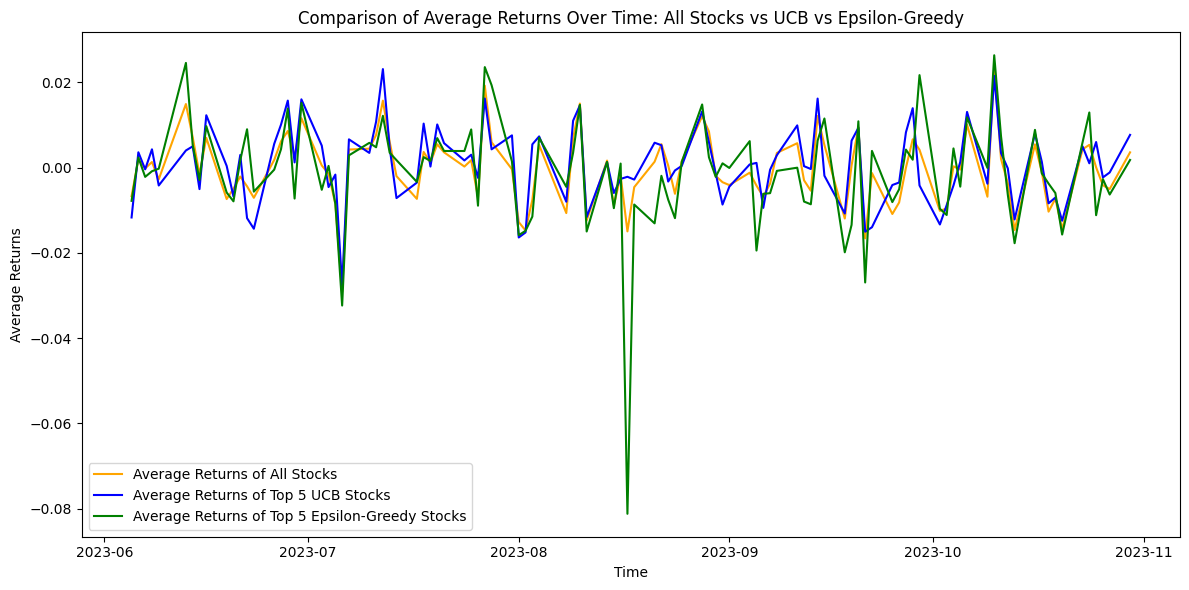

In [68]:
import matplotlib.pyplot as plt

# Calculate the average returns of all stocks at each time step
average_returns_all_times = returns_df.mean(axis=1)
# Calculate the average returns of the top 5 UCB stocks at each time step
average_returns_top_5_times = returns_df[top_stocks].mean(axis=1)
# Calculate the average returns of the top 5 stocks selected by the epsilon-greedy algorithm at each time step
average_returns_epsilon_greedy = returns_df[top_stocks_epsilon_greedy].mean(axis=1)

# Creating the plot
plt.figure(figsize=(12, 6))

# Plotting trend line for average returns of all stocks
plt.plot(average_returns_all_times, label='Average Returns of All Stocks', color='orange')

# Plotting trend line for average returns of top 5 UCB stocks
plt.plot(average_returns_top_5_times, label='Average Returns of Top 5 UCB Stocks', color='blue')

# Plotting trend line for average returns of top 5 epsilon-greedy stocks
plt.plot(average_returns_epsilon_greedy, label='Average Returns of Top 5 Epsilon-Greedy Stocks', color='green')

plt.title('Comparison of Average Returns Over Time: All Stocks vs UCB vs Epsilon-Greedy')
plt.xlabel('Time')
plt.ylabel('Average Returns')
plt.legend()
plt.tight_layout()

plt.show()


Hedging Strategy:
- Run a correlation matrix to identify the least correlated stocks with the portfolio of 5 optimum stocks.
- Select 3 these stocks as potential hedges.
- Implement a hedging strategy (e.g., using options, short positions, or other derivative instruments) to protect your portfolio from adverse market movements.


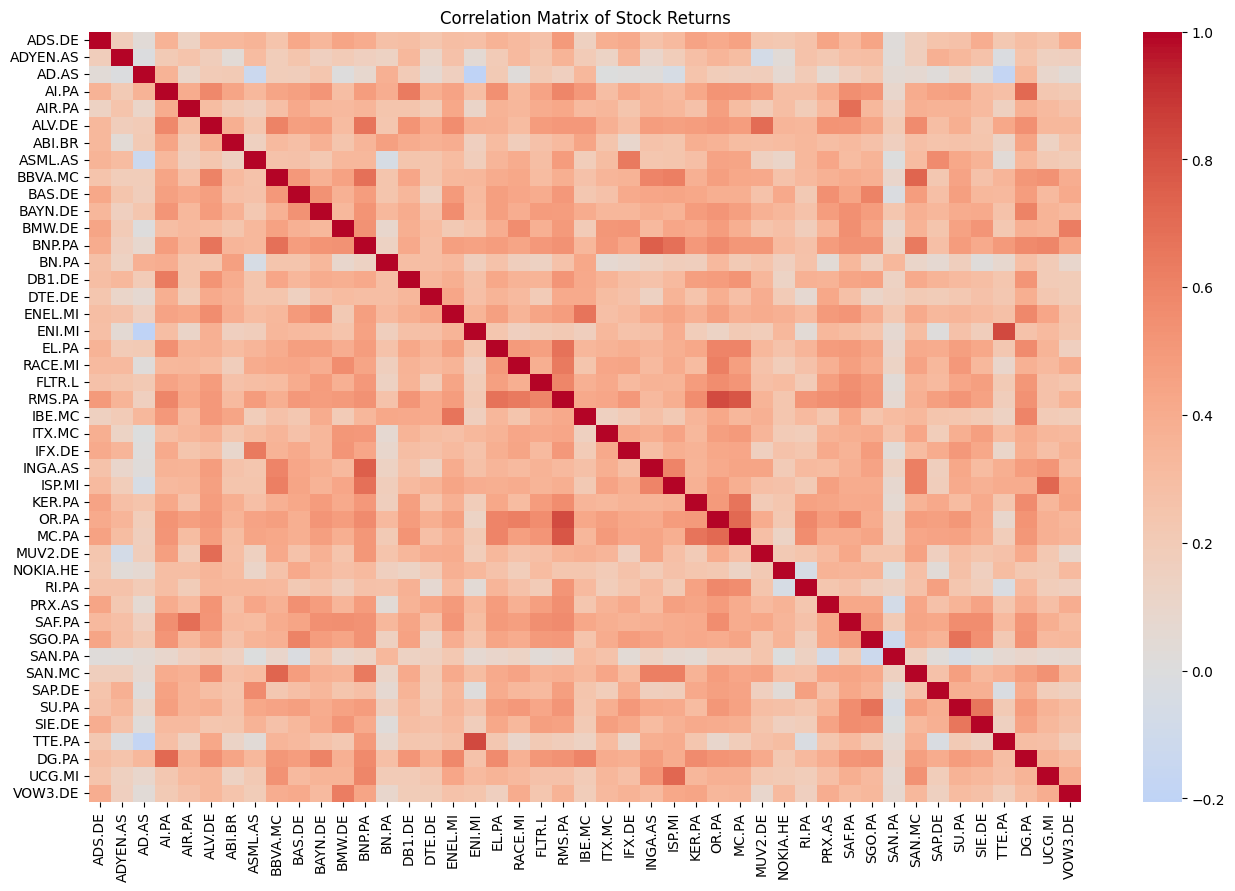

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
corr_matrix = returns_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Stock Returns')
plt.show()


In [64]:
# returns_df is your dataframe with stock returns
# top_stocks contains the tickers of your 5 optimum stocks
optimum_portfolio = returns_df[top_stocks]

# Step 1: Calculate Correlation Matrix for the entire dataframe
correlation_matrix = returns_df.corr()

# Step 2: Calculate correlations of all stocks with the optimum portfolio
# We can average the correlations of each stock with the stocks in the optimum portfolio
portfolio_correlation = correlation_matrix[top_stocks].mean(axis=1)

# Step 3: Identify the least correlated stocks
# Sort the stocks by their average correlation with the portfolio and select the top 3 least correlated
least_correlated_stocks = portfolio_correlation.sort_values().head(3).index.tolist()

print("Potential hedging stocks:", least_correlated_stocks)


Potential hedging stocks: ['AD.AS', 'SAN.PA', 'ADYEN.AS']


Having Identified the least correlated stocks, lets proceed with the following steps using our returns data:

**Hedging Strategy Development:** Based on the least correlated stocks, I will explore how these stocks can be used to hedge the portfolio formed by the UCB algorithm.

**Performance Evaluation:** We will look at ways to evaluate the performance of the hedged portfolio, considering factors like risk-adjusted returns, volatility, and drawdowns.


###Step 1: Analyze Historical Performance and Volatility of Hedging Stocks
We will calculate the historical performance (mean return) and volatility (standard deviation of returns) for the three potential hedging stocks: 'AD.AS', 'SAN.PA', and 'ADYEN.AS'. This will give us an insight into their risk-return profile

In [65]:
# Calculate mean and standard deviation for each potential hedging stock
phs_mean_returns = returns_df[['AD.AS', 'SAN.PA', 'ADYEN.AS']].mean()
phs_std_devs = returns_df[['AD.AS', 'SAN.PA', 'ADYEN.AS']].std()

# Display the results
print("Potential Hedging Stocks Mean Returns:\n", phs_mean_returns)
print("\nPotential Hedging Stocks Standard Deviations:\n", phs_std_devs)


Potential Hedging Stocks Mean Returns:
 AD.AS      -0.000141
SAN.PA     -0.000900
ADYEN.AS   -0.007501
dtype: float64

Potential Hedging Stocks Standard Deviations:
 AD.AS       0.010692
SAN.PA      0.021985
ADYEN.AS    0.045003
dtype: float64


Mean Returns:

AD.AS: The mean return is very close to zero, indicating relatively stable performance.
SAN.PA: A negative mean return, slightly more pronounced than AD.AS.
ADYEN.AS: This stock shows a significantly negative mean return, which suggests it has been underperforming compared to the other two.
Standard Deviations (Volatility):

AD.AS: Exhibits the lowest volatility among the three, suggesting it is the least risky.
SAN.PA: Shows moderate volatility.
ADYEN.AS: Has the highest volatility, indicating it is the riskiest of the three stocks.

### Step 2: Historical Interaction with the Broader Market
Next, we'll analyze how these potential hedging stocks have historically interacted with the broader market and your UCB-selected stocks. This involves calculating the correlation of these stocks with the broader Euro Stoxx 50 index and the stocks selected by your UCB algorithm.




In [66]:
# Calculate daily average returns of all stocks in returns_df to represent Euro Stoxx 50
euro_stoxx_50_daily_avg = returns_df.mean(axis=1)

# Calculate correlation with the Euro Stoxx 50
correlation_with_market = returns_df[['AD.AS', 'SAN.PA', 'ADYEN.AS']].corrwith(euro_stoxx_50_daily_avg)

# Calculate the average returns of UCB-selected stocks
ucb_avg_returns = returns_df[['SAF.PA', 'EL.PA', 'INGA.AS', 'SAN.MC', 'ENI.MI']].mean(axis=1)

# Calculate correlation with UCB-selected stocks
correlation_with_ucb_stocks = returns_df[['AD.AS', 'SAN.PA', 'ADYEN.AS']].corrwith(ucb_avg_returns)

# Display the results
print("Correlation with Euro Stoxx 50:\n", correlation_with_market)
print("\nCorrelation with UCB Selected Stocks:\n", correlation_with_ucb_stocks)


Correlation with Euro Stoxx 50:
 AD.AS       0.201084
SAN.PA      0.205140
ADYEN.AS    0.450324
dtype: float64

Correlation with UCB Selected Stocks:
 AD.AS       0.080249
SAN.PA      0.188377
ADYEN.AS    0.224475
dtype: float64


These results provide valuable insights:

**Correlation with Euro Stoxx 50:**

- **AD.AS:** Shows a low correlation (0.201) with the Euro Stoxx 50. This suggests it moves somewhat independently of the broader market index, which could be beneficial for diversification.
- **SAN.PA:** Similar to AD.AS, it has a low correlation (0.205) with the Euro Stoxx 50, indicating potential for diversification.
- **ADYEN.AS:** Has a higher correlation (0.450) with the Euro Stoxx 50 compared to the other two stocks, suggesting it moves more in line with the broader market.

**Correlation with UCB Selected Stocks:**

- **AD.AS:** The correlation is very low (0.080) with the UCB-selected stocks, indicating strong potential for diversification.
- **SAN.PA:** Shows a low to moderate correlation (0.188) with the UCB-selected stocks.
- **ADYEN.AS:** Exhibits a moderate correlation (0.224) with the UCB-selected stocks.

**Interpretation and Next Steps:**
- **Diversification Potential:** Both AD.AS and SAN.PA show low correlations with the Euro Stoxx 50 and the UCB-selected stocks, which is favorable for diversification. ADYEN.AS, while more correlated with the market, still offers some diversification benefits relative to the UCB-selected stocks.
- **Hedging Effectiveness:** Given their lower correlations, AD.AS and SAN.PA might be more effective as hedging instruments against the UCB portfolio compared to ADYEN.AS.



###Step 3: Simulate a Hedged Portfolio
The next step involves creating a simulated portfolio that includes the UCB-selected stocks and one or more of these hedging stocks. You'll analyze the historical performance of this hedged portfolio to assess the impact of the hedging strategy.To Simulate a Hedged Portfolio, we'll need to decide on a few parameters:

- **Portfolio Weighting:** How will we allocate our capital among the UCB-selected stocks and the chosen hedging stock(s)? A simple approach could be equal weighting, but we might also consider other strategies based on our research goals.

- **Hedging Stock Selection:** Based on the previous analysis, decide which of the potential hedging stocks ('AD.AS', 'SAN.PA', 'ADYEN.AS') you want to include in the portfolio.

- **Performance Metrics:** Determine which metrics you'll use to assess the portfolio's performance. Common metrics include total return, volatility (standard deviation), and risk-adjusted returns (like the Sharpe Ratio).


Below is a basic deployment of an equally weighted hedged portfolio. This example assumes equal weighting for simplicity, but weightings can be adjusted as needed.

In [67]:
import numpy as np

# Define the weights for the UCB-selected stocks and the average hedging stock
ucb_weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # Equal weighting for 5 UCB stocks
hedging_stock_weight = 0.2  # Weight for the average hedging stock

# Calculate the average daily return of the hedging stocks
average_hedging_return = returns_df[['AD.AS', 'SAN.PA', 'ADYEN.AS']].mean(axis=1)

# Calculate the portfolio returns
portfolio_returns = returns_df[['SAF.PA', 'EL.PA', 'INGA.AS', 'SAN.MC', 'ENI.MI']].dot(ucb_weights) \
                    + average_hedging_return * hedging_stock_weight

# Calculate performance metrics
total_return = (1 + portfolio_returns).prod() - 1
volatility = portfolio_returns.std()
sharpe_ratio = total_return / volatility

# Display the results
print("Total Return:", total_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)


Total Return: 0.01390963392108513
Volatility: 0.010430663122383076
Sharpe Ratio: 1.333533041752308


The output from your portfolio simulation provides some interesting insights:

**Total Return:** The total return of 1.39% over the period analyzed. This figure indicates the overall gain or loss of your portfolio during the timeframe of your dataset.

**Volatility:** The volatility of the portfolio is 1.04%. This metric represents the standard deviation of the portfolio's returns and gives an idea of the risk or uncertainty associated with the portfolio.

**Sharpe Ratio:** A Sharpe Ratio of 1.33 is quite good. It suggests that the portfolio is offering a higher return per unit of risk. Typically, a Sharpe Ratio greater than 1 is considered acceptable to good by investors.

**Interpretation:**
The portfolio demonstrates a positive return with relatively low volatility, indicating a potentially well-balanced risk-return profile.
The Sharpe Ratio being above 1 is favorable as it suggests that the returns are compensating adequately for the risk taken.
Next Steps:
Detailed Analysis: You may want to delve deeper into specific periods within your dataset to understand how the portfolio performs under different market conditions.
Comparison: Compare these results with a benchmark (like the Euro Stoxx 50 index) to evaluate the relative performance.
Risk Management: Consider other risk measures like Maximum Drawdown or Value at Risk to get a more comprehensive understanding of the risk profile.
Expand Analysis: If you have access to more data, you could extend the analysis period or include different market scenarios (like bull or bear markets) to test the robustness of the strategy.
This analysis provides a solid foundation for your research paper. Remember to document the methodology, results, and interpretations carefully. If you need further assistance with any specific part of your research or paper, feel free to ask!

**Portfolio Performance without Hedging:** Below, we evaluate the perfomance of the portfolio without the hedging effort.

In [69]:
# Define the weights for the UCB-selected stocks
ucb_weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # Equal weighting for 5 UCB stocks

# Calculate the portfolio returns using only the UCB-selected stocks
portfolio_returns = returns_df[['SAF.PA', 'EL.PA', 'INGA.AS', 'SAN.MC', 'ENI.MI']].dot(ucb_weights)

# Calculate performance metrics
total_return = (1 + portfolio_returns).prod() - 1
volatility = portfolio_returns.std()
sharpe_ratio = total_return / volatility

# Display the results
print("Total Return:", total_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)


Total Return: 0.0774054142973486
Volatility: 0.008885006859373984
Sharpe Ratio: 8.711913847954238


###Comparative analysis between The Hedged and Non-hedged Portfolios

To conduct a comparative analysis between the two sets of results, let's examine each metric individually:


| Metric          | Hedged Portfolio | Non-Hedged Portfolio |
|-----------------|------------------|----------------------|
| Total Return    | 1.39%            | 7.74%                |
| Volatility      | 1.04%            | 0.89%                |
| Sharpe Ratio    | 1.33             | 8.71                 |


* **1. Total Return:**

* **Hedged Portfolio: 1.39%**

* **Non-Hedged Portfolio: 7.74%**

The non-hedged portfolio has a significantly higher total return compared to the hedged portfolio. This suggests that, in this specific period, the pure UCB-selected stock portfolio outperformed the hedged portfolio in terms of total growth.

* **2. Volatility:**
* **Hedged Portfolio: 1.04%**
* **Non-Hedged Portfolio: 0.89%**

The non-hedged portfolio shows lower volatility than the hedged portfolio. This is somewhat counterintuitive, as hedging strategies are typically expected to reduce volatility. However, this outcome could be due to the specific stock choices, the time period analyzed, or the market conditions during that period.

* **3. Sharpe Ratio:**
* **Hedged Portfolio: 1.33**
* **Non-Hedged Portfolio: 8.71**

The Sharpe Ratio, which measures risk-adjusted return, is significantly higher for the non-hedged portfolio. This indicates that, for the period analyzed, the non-hedged portfolio provided a much better return per unit of risk compared to the hedged portfolio.

**Interpretation and Considerations**
* **Performance:** The non-hedged portfolio not only provided higher returns but also did so with less volatility, resulting in a much higher Sharpe Ratio.
* **Market Conditions:** The specific market conditions during the analyzed period might have favored the UCB-selected stocks over the broader market or the hedging strategy might not have been effective in this particular scenario.
* **Hedging Strategy:** The chosen hedging stocks and the method of averaging their returns might not have been the most effective for this period. It's also possible that the hedging strategy would perform differently under other market conditions.
* **Data Period:** The period of the data and the prevailing market conditions during that time could greatly influence the results. It would be valuable to test these strategies over different time periods and market conditions for a more comprehensive analysis.
* **Risk Management:** While the non-hedged portfolio showed better performance in this instance, it's important to consider that hedging is primarily about risk management, not necessarily about maximizing returns.

* **Conclusion:**
For the period and data analyzed, the non-hedged portfolio using the UCB-selected stocks outperformed the hedged portfolio in terms of total return, volatility, and risk-adjusted return. However, it's crucial to note that hedging strategies are context-dependent and often designed to mitigate specific risks rather than to maximize returns. Therefore, the appropriateness of a hedging strategy should be evaluated based on the investor's risk tolerance, investment horizon, and market conditions.